## Import dependencies and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()
# No missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

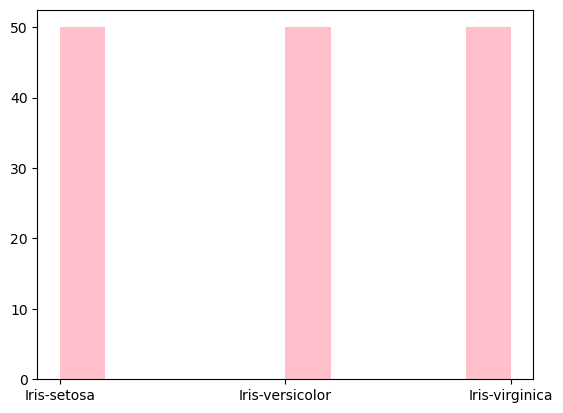

In [9]:
plt.hist(y, color='pink')
plt.show()
# Equal distributions of classes (Iris-setosa, Iris-versicolor, Iris-verginica)

## Data preprocessing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# By default uses multiple class regression
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

## Evaluate

In [26]:
classifier.score(X_train, y_train)

0.9714285714285714

In [27]:
classifier.score(X_test, y_test)

0.9555555555555556

In [28]:
# Predicting single example
classifier.predict(scaler.transform([[ 1.95086475, -0.50467027,  1.39582885,  0.99212695]]))

array(['Iris-versicolor'], dtype=object)

In [29]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# 2 values predicted wrong

[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [32]:
print("Accuracy on test data: ", accuracy_score(y_test, y_test_pred))

Accuracy on test data:  0.9555555555555556


## Visualisation

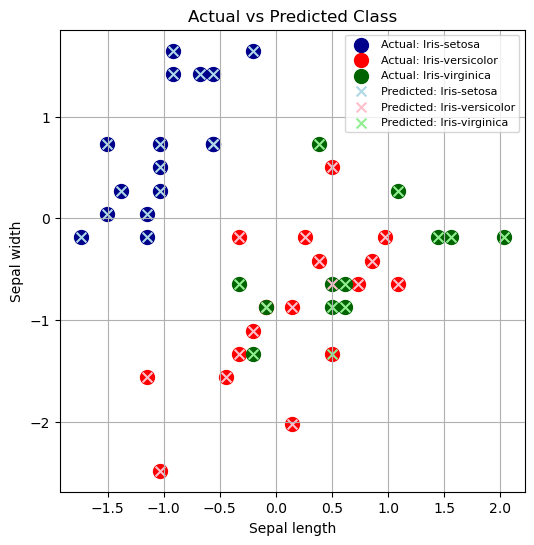

In [33]:
plt.figure(figsize=(6, 6))

# Actual class points (circles)
for species, color in [('Iris-setosa', 'darkblue'), 
                       ('Iris-versicolor', 'red'), 
                       ('Iris-virginica', 'darkgreen')]:
    mask = (y_test == species)
    plt.scatter(X_test[mask, 0], X_test[mask, 1], 
                color=color, marker='o', label=f'Actual: {species}', s=100)

# Predicted class points (crosses)
for species, color in [('Iris-setosa', 'lightblue'), 
                       ('Iris-versicolor', 'pink'), 
                       ('Iris-virginica', 'lightgreen')]:
    mask = (y_test_pred == species)
    plt.scatter(X_test[mask, 0], X_test[mask, 1], 
                color=color, marker='x', label=f'Predicted: {species}', s=50)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Actual vs Predicted Class')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()


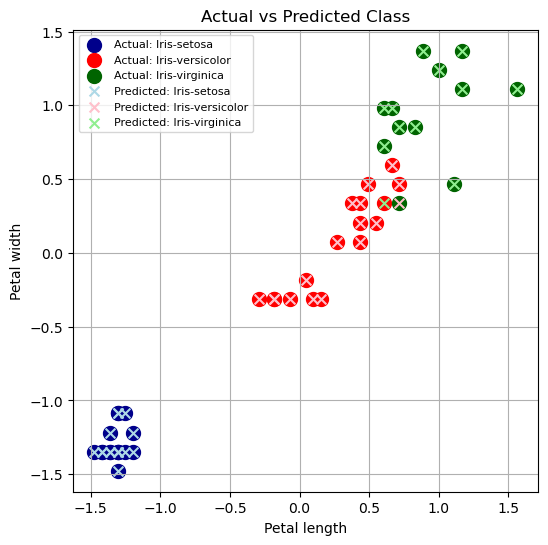

In [34]:
plt.figure(figsize=(6, 6))

# Actual class points (circles)
for species, color in [('Iris-setosa', 'darkblue'), 
                       ('Iris-versicolor', 'red'), 
                       ('Iris-virginica', 'darkgreen')]:
    mask = (y_test == species)
    plt.scatter(X_test[mask, 2], X_test[mask, 3], 
                color=color, marker='o', label=f'Actual: {species}', s=100)

# Predicted class points (crosses)
for species, color in [('Iris-setosa', 'lightblue'), 
                       ('Iris-versicolor', 'pink'), 
                       ('Iris-virginica', 'lightgreen')]:
    mask = (y_test_pred == species)
    plt.scatter(X_test[mask, 2], X_test[mask, 3], 
                color=color, marker='x', label=f'Predicted: {species}', s=50)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Actual vs Predicted Class')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()